In [5]:
%pip install mecab-python3 

Note: you may need to restart the kernel to use updated packages.


In [1]:
%cat /usr/local/etc/mecabrc

;
; Configuration file of MeCab
;
; $Id: mecabrc.in,v 1.3 2006/05/29 15:36:08 taku-ku Exp $;
;
dicdir =  /usr/local/lib/mecab/dic/ipadic

; userdic = /home/foo/bar/user.dic

; output-format-type = wakati
; input-buffer-size = 8192

; node-format = %m\n
; bos-format = %S\n
; eos-format = EOS\n



In [3]:
import MeCab

# MeCabの初期化
tagger = MeCab.Tagger('-d /usr/local/lib/mecab/dic/ipadic/')

# 入力ファイルと出力ファイルのパス
input_file_path = 'neko.txt'
output_file_path = 'neko2.txt.mecab'

# 入力ファイルを読み込み、形態素解析を行い、出力ファイルに保存
with open(input_file_path, 'r', encoding='utf-8') as infile, open(output_file_path, 'w', encoding='utf-8') as outfile:
    for line in infile:
        parsed_line = tagger.parse(line)
        if parsed_line:
            outfile.write(parsed_line)

In [11]:
## 形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．
## ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，
## 1文を形態素（マッピング型）のリストとして表現せよ．
## 第4章の残りの問題では，ここで作ったプログラムを活用せよ．

# mecabの出力
# 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
# 一行を「/t」と「,」で分割
# dict[表層系，基本形，品詞，品詞細分類1] = 形態素（表層系） となるように計算
# EOSが読み込まれ次第新たなlistの要素にする

import re
import numpy as np

with open('neko2.txt.mecab','r') as f:
    neko_data = f.read()
split_neko = neko_data.split("\n")

sentence_list = list()
dict_line = dict()
sentence = list()

for line in split_neko:
    split_line = re.split('[\t,]',line)
    #print(split_line)
    if len(split_line) == 1 and split_line[0] == "":
        continue
    if len(split_line) == 1 and split_line[0] == "EOS":
        sentence_list.append(sentence)
        sentence = list()
        continue
    #print(split_line[0],split_line[7],split_line[1],split_line[2])
    dict_line["surface"] = split_line[0]
    dict_line["base"] = split_line[7]
    dict_line["pos"] = split_line[1]
    dict_line["pos1"] = split_line[2]
    sentence.append(dict_line)
    dict_line = dict()

#for line in sentence_list:
    #print(line)

In [16]:
#動詞の表層形をすべて抽出せよ．

verbs = list()

for line in sentence_list:
    for morph in line:
        if morph['pos'] == "動詞":
            verbs.append(morph['surface'])
print(verbs)

['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え', '煮', '食う', '思わ', '載せ', 'られ', '持ち上げ', 'られ', 'し', 'あっ', '落ちつい', '見', '見', '思っ', '残っ', 'いる', 'さ', 'れ', 'し', '逢っ', '出会わ', 'し', 'のみ', 'なら', 'し', 'いる', '吹く', 'せ', '弱っ', '飲む', '知っ', '坐っ', 'おっ', 'する', 'し', '始め', '動く', '動く', '分ら', '廻る', 'なる', '助から', '思っ', 'いる', 'さり', 'し', '出', 'し', 'いる', '考え出そ', '分ら', '付い', '見る', 'い', 'おっ', '見え', '隠し', 'しまっ', '違っ', '明い', 'い', 'られ', '這い出し', '見る', '棄て', 'られ', '這い出す', 'ある', '坐っ', 'し', '考え', '見', '出', 'し', '泣い', '来', 'くれる', '考え付い', 'やっ', '見', '来', '渡っ', 'かかる', '減っ', '来', '泣き', '出', 'ある', 'ある', 'し', 'そろ', '廻り', '始め', 'し', '這っ', '行く', '出', '這入っ', 'なる', '思っ', '崩れ', 'もぐり込ん', '破れ', 'い', 'し', '知れ', '云っ', '至る', 'する', 'なっ', 'いる', '忍び込ん', '分ら', 'なる', '減る', '降っ', '来る', '出来', 'なっ', 'あるい', '行く', '考える', '這入っ', 'おっ', '見る', 'し', '逢っ', '見る', 'つかん', '抛り出し', '思っ', 'ねぶっ', '任せ', 'い', '出来', '見', '這い', '上っ', '投げ出さ', 'れ', '投げ出さ', 'れ', '這い', '上り', '這い', '上っ', '投げ出さ', 'れ', '繰り返し', 'し', 'いる', '云う', 'なっ', 'し', 'やっ', '下り', 'つまみ出さ', 'れよ

In [17]:
#動詞の基本形をすべて抽出せよ

verbs_base = list()

for line in sentence_list:
    for morph in line:
        if morph['pos'] == "動詞":
            verbs_base.append(morph['base'])
print(verbs_base)

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える', '煮る', '食う', '思う', '載せる', 'られる', '持ち上げる', 'られる', 'する', 'ある', '落ちつく', '見る', '見る', '思う', '残る', 'いる', 'する', 'れる', 'する', '逢う', '出会う', 'する', 'のむ', 'なる', 'する', 'いる', '吹く', 'する', '弱る', '飲む', '知る', '坐る', 'おる', 'する', 'する', '始める', '動く', '動く', '分る', '廻る', 'なる', '助かる', '思う', 'いる', 'さる', 'する', '出る', 'する', 'いる', '考え出す', '分る', '付く', '見る', 'いる', 'おる', '見える', '隠す', 'しまう', '違う', '明く', 'いる', 'られる', '這い出す', '見る', '棄てる', 'られる', '這い出す', 'ある', '坐る', 'する', '考える', '見る', '出る', 'する', '泣く', '来る', 'くれる', '考え付く', 'やる', '見る', '来る', '渡る', 'かかる', '減る', '来る', '泣く', '出る', 'ある', 'ある', 'する', 'そる', '廻る', '始める', 'する', '這う', '行く', '出る', '這入る', 'なる', '思う', '崩れる', 'もぐり込む', '破れる', 'いる', 'する', '知れる', '云う', '至る', 'する', 'なる', 'いる', '忍び込む', '分る', 'なる', '減る', '降る', '来る', '出来る', 'なる', 'あるく', '行く', '考える', '這入る', 'おる', '見る', 'する', '逢う', '見る', 'つかむ', '抛り出す', '思う', 'ねぶる', '任せる', 'いる', '出来る', '見る', '這う', '上る', '投げ出す', 'れる', '投げ出す', 'れる', '這う', '上る', '這う', '上る', '投げ出す', 'れる', '

In [24]:
#2つの名詞が「の」で連結されている名詞句を抽出せよ

nouns = list()

for line in sentence_list:
    for i in range(len(line)):
        if line[i]['base'] == "の" and line[i]['pos'] == "助詞":
            #print(line)
            if i<len(line)-1:
                if line[i-1]['pos'] == "名詞" and line[i+1]['pos'] == "名詞":
                    nouns.append(str(line[i-1]['surface']+"の"+line[i+1]['surface']))

print(nouns)

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親', '藁の上', '笹原の中', '池の前', '池の上', '一樹の蔭', '垣根の穴', '隣家の三', '時の通路', '一刻の猶予', '家の内', '彼の書生', '以外の人間', '前の書生', 'おさんの隙', 'おさんの三', '胸の痞', '家の主人', '主人の方', '鼻の下', '吾輩の顔', '自分の住', '吾輩の主人', '家のもの', 'うちのもの', '彼の書斎', '本の上', '皮膚の色', '本の上', '彼の毎夜', '以外のもの', '主人の傍', '彼の膝', '膝の上', '経験の上', '飯櫃の上', '炬燵の上', 'ここのうち', '供の寝床', '彼等の中間', '供の一', '例の神経', '性の主人', '次の部屋', '自分の勝手', '吾輩の方', '台所の板の間', '吾輩の尊敬', '向の白', '玉のよう', 'そこの家', '家の書生', '裏の池', '親子の愛', 'もっともの議論', '刺の頭', '鰡の臍', '彼等のため', '軍人の家', '代言の主人', '教師の家', '猫の時節', '吾輩の家', '家の主人', 'だらけの英文', '胃弱の癖', '後架の中', '平の宗', '月の月給', '当分の間', '下のよう', '今更のよう', '主人の述懐', '彼の友', '金縁の眼鏡', '主人の顔', '内の想像', '訳のもの', '利の大家', '金縁の裏', '吾輩の後ろ', '彼の友', '吾輩の輪廓', '顔のあたり', '上乗の出来', '顔の造作', '他の猫', '不器量の吾輩', '吾輩の主人', '斯産の猫', '斑入りの皮膚', '主人の彩色', '一種の色', '身内の筋肉', '主人の予定', '座敷の中', '悪口の言いよう', '人の気', '彼の背中', 'こっちの便利', '自己の力量', '人間の不徳', '吾輩の家', '家の裏', '浩然の気', '小春の穏', '日の二', '茶の木の根', '西側の杉', '垣のそば', '他の庭', '純粋の黒', '彼の皮膚', '皮膚の上',

In [35]:
#名詞の連接（連続して出現する名詞）を最長一致で抽出せよ

ct_noun = list()

for line in sentence_list:
    temp_noun = ""
    cnt = 0
    for morph in line:
        if morph["pos"] == "名詞":
            temp_noun += morph["surface"]
            cnt += 1
        else:
            if cnt > 1:
                ct_noun.append(temp_noun)
            temp_noun = ""
            cnt = 0   

length = 0
longest = list()
for elm in ct_noun:
    if len(elm) > length:
        longest.append(elm)
        length = len(elm)

print(longest)

['人間中', '一番獰悪', 'ぷうぷうと煙', '尻ぺたをひどく', '大家アンドレア・デル・サルト', 'いくらアンドレア・デル・サルト', "manyaslip'twixtthecupandthelip"]


In [80]:
#文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ

word_dict = dict()

for line in sentence_list:
    for morph in line:
        if morph["pos"] == "記号":
            continue
        base = str(morph["base"])
        if base in word_dict:
            word_dict[base] += 1
        else:
            word_dict[base] = 1

sort_word_list = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)

print(sort_word_list)

[('の', 9194), ('て', 6848), ('は', 6420), ('に', 6243), ('を', 6071), ('だ', 5975), ('と', 5508), ('が', 5337), ('た', 4267), ('する', 3657), ('ない', 3052), ('も', 2479), ('ある', 2320), ('*', 2191), ('で', 2081), ('から', 2031), ('いる', 1777), ('ん', 1568), ('か', 1529), ('云う', 1408), ('事', 1207), ('です', 1164), ('ます', 1146), ('なる', 1120), ('へ', 1034), ('う', 987), ('もの', 981), ('君', 973), ('主人', 932), ('ぬ', 719), ('よう', 696), ('見る', 675), ('ね', 657), ('この', 649), ('御', 636), ('ば', 617), ('人', 602), ('その', 576), ('一', 554), ('そう', 546), ('何', 539), ('思う', 502), ('よ', 502), ('吾輩', 481), ('来る', 460), ('れる', 450), ('じゃ', 450), ('これ', 414), ('さ', 410), ('それ', 381), ('聞く', 347), ('でも', 346), ('時', 345), ('行く', 340), ('出来る', 324), ('三', 319), ('出る', 317), ('な', 317), ('まで', 313), ('ところ', 313), ('方', 312), ('やる', 311), ('二', 303), ('上', 294), ('いい', 294), ('寒月', 286), ('顔', 282), ('先生', 274), ('人間', 272), ('くらい', 269), ('僕', 268), ('ごとし', 261), ('さん', 260), ('気', 250), ('猫', 248), ('だけ', 246), ('たい', 241), ('また',

In [85]:
%pip install japanize-matplotlib | tail -n 1

Note: you may need to restart the kernel to use updated packages.


In [87]:
%pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


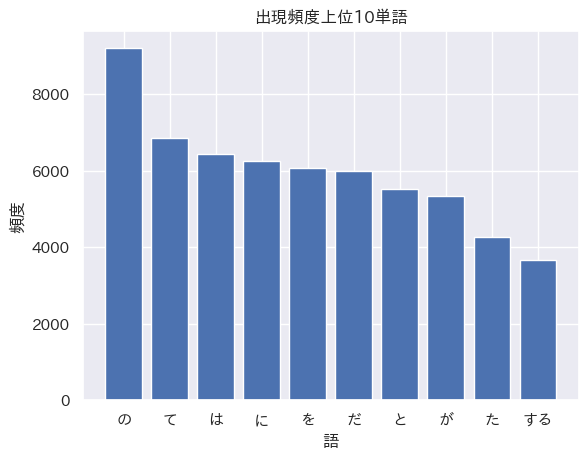

In [99]:
#出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

import matplotlib.pyplot as plt
import japanize_matplotlib #日本語化matplotlib
import seaborn as sns
from collections import defaultdict
sns.set(font="IPAexGothic")

word_dict = dict()

for line in sentence_list:
    for morph in line:
        if morph["pos"] == "記号":
            continue
        base = str(morph["base"])
        if base in word_dict:
            word_dict[base] += 1
        else:
            word_dict[base] = 1

sort_word_list = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)

top_10 = sort_word_list[:10]

words, frequencies = zip(*top_10)

plt.bar(words, frequencies)
plt.xlabel('語')
plt.ylabel('頻度')
plt.title('出現頻度上位10単語')
plt.show()


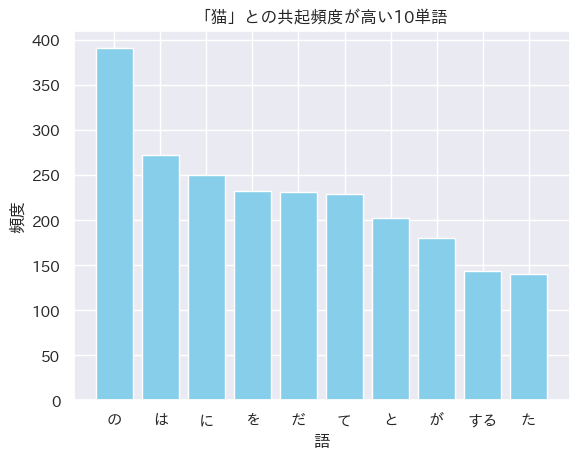

In [100]:
import matplotlib.pyplot as plt
import japanize_matplotlib #日本語化matplotlib
import seaborn as sns
from collections import defaultdict
sns.set(font="IPAexGothic")

word_dict = defaultdict(int)

for line in sentence_list:
    if any(morph["base"] == "猫" for morph in line):
        for morph in line:
            if morph["base"] != "猫" and morph["pos"] != "記号":
                word_dict[morph["base"]] += 1

sort_word_list = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)
top_10 = sort_word_list[:10]

words, frequencies = zip(*top_10)

plt.bar(words, frequencies)
plt.xlabel('語')
plt.ylabel('頻度')
plt.title('「猫」との共起頻度が高い10単語')
plt.show()

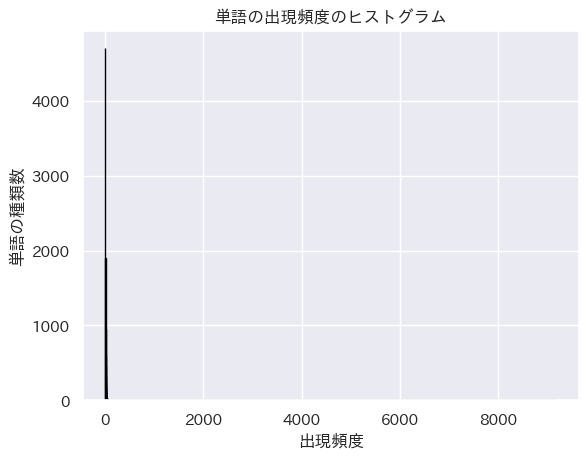

In [93]:
## 単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．
## 縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である

word_dict = dict()

for line in sentence_list:
    for morph in line:
        if morph["pos"] == "記号":
            continue
        base = str(morph["base"])
        if base in word_dict:
            word_dict[base] += 1
        else:
            word_dict[base] = 1

sort_word_dict = dict(sorted(word_dict.items(), key=lambda x: x[1], reverse=True))

frequencies = list(sort_word_dict.values())

plt.hist(frequencies, bins=range(1, max(frequencies) + 2), edgecolor='black', align='left')
plt.xlabel('出現頻度')
plt.ylabel('単語の種類数')
plt.title('単語の出現頻度のヒストグラム')
plt.show()

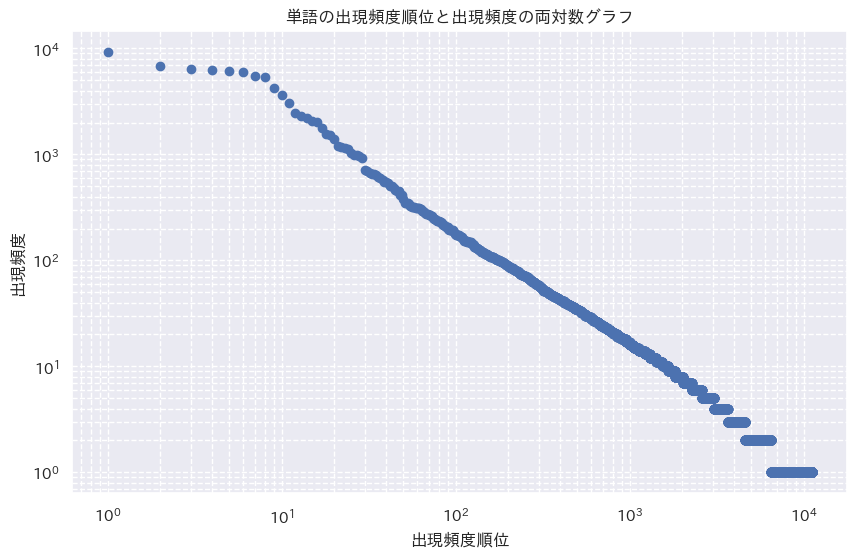

In [95]:
## 単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ

word_dict = dict()

for line in sentence_list:
    for morph in line:
        if morph["pos"] == "記号":
            continue
        base = str(morph["base"])
        if base in word_dict:
            word_dict[base] += 1
        else:
            word_dict[base] = 1

sort_word_list = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)

# 頻度リストを作成
frequencies = [freq for word, freq in sort_word_list]

# 頻度順位リストを作成
ranks = range(1, len(frequencies) + 1)

# 両対数グラフのプロット
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker='o', linestyle='none')
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.title('単語の出現頻度順位と出現頻度の両対数グラフ')
plt.grid(True, which="both", ls="--")
plt.show()